In [1]:
# Load all necessary packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import re

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



plt.style.use('bmh')
%matplotlib inline

## Load Dataset

In [2]:
## Loading dataset
df=pd.read_csv('clean_data.csv',index_col=[0])

In [3]:
df.rename(columns={
    "article_vertical":"category_type",
    "title":"article_title",
    "body":"article",
    "pubDate":"publish_date",
    "readingTime":"reading_time"},inplace=True)

In [4]:
df.head()

,category_type,article_title,article,publish_date,reading_time
0,credit-cards,Working from home? ATO says to make your tax w...,We’re a little over a month away from the end ...,"Thu, 13 Sep 2018 03:50:02 +0000",3
1,home-loans,Westpac and St.George offer home loan incentives,Australians looking for new home loans or cons...,"Wed, 27 Jun 2018 01:52:39 +0000",2
2,home-loans,Suburbs with the greatest property change reve...,CoreLogic research has revealed the Australian...,"Tue, 26 Jun 2018 06:23:12 +0000",5
3,default,RateCity Sales,"RateCity users are often savvy shoppers, who u...","Fri, 10 Mar 2017 01:36:53 +0000",4
4,home-loans,"Line of credit home loans, explained and analy...",Do you want more financial freedom? Have you g...,"Wed, 08 Mar 2017 14:00:18 +0000",4


In [5]:
focussed_category=['credit-cards','home-loans','superannuation','car-loans',
                   'savings-accounts','bank-accounts','personal-loans','term-deposits']

df_cat=df[df.category_type.isin(focussed_category)]

In [6]:
df_cat.head()
df_cat=df_cat.dropna()

## Cleaning out punctuation,numbers to text,lowercase,remove stopwords

In [7]:
#Inflect library will help with numbers to text conversion
import inflect

#Importing the nltk library
from nltk.stem import LancasterStemmer, WordNetLemmatizer,PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk import pos_tag

In [8]:
#Function to clean out punctuation
def remove_punctuation(words):
    strip_words=words.translate(words.maketrans('', '', string.punctuation))
    return strip_words

#Funtion to remove contractions
def removeContractions(text):
    text=result = re.sub(r"’", "'", text, 0, re.MULTILINE | re.IGNORECASE)
    regex = r"ain't|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|he's|how'd|how'd'y|how'll|how's|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|it's|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|she's|should've|shouldn't|shouldn't've|so've|so's|that'd|that'd've|that's|there'd|there'd've|there's|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what's|what've|when's|when've|where'd|where's|where've|who'll|who'll've|who's|who've|why's|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'alls|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've|'s|s'"
    text=result = re.sub(regex, "", text, 0, re.MULTILINE | re.IGNORECASE)
    return text

#Function to define if word is noun,verb etc
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Function to make text lowercase
def lower_word(words):
    lower_words=words.lower()
    return lower_words

def lemmatize_word(words): 
    lemma=WordNetLemmatizer()
    tokens= word_tokenize(words)
    tagged=pos_tag(tokens)
    lemma_list=[]
    for word,tag in tagged:
        wntag=get_wordnet_pos(tag)
        if wntag is None:
            lemma_list.append(lemma.lemmatize(word))
        else:
            lemma_list.append(lemma.lemmatize(word,pos=wntag))
    return (" ".join(lemma_list))
        
def stem_word(words):
    stem=PorterStemmer()
    words = word_tokenize(words)
    stem_list=[]
    for w in words:
        stem_list.append(stem.stem(w))
    return (" ".join(stem_list))

def stopwords_remove(text):
    text = word_tokenize(text)
    stop = stopwords.words('english')
    new_article=[x for x in text if x.lower() not in stop]
    return (" ".join(new_article))


def lower_stop_lemma(words):
    new_article=removeContractions(words)
    new_article=lemmatize_word(new_article)
    new_article=stopwords_remove(new_article)
    return new_article

In [9]:
#New column for the cleaned articles
df_cat['cleaned_article']=df_cat.article.apply(lower_stop_lemma)

In [10]:
df_cat.head()

,category_type,article_title,article,publish_date,reading_time,cleaned_article
0,credit-cards,Working from home? ATO says to make your tax w...,We’re a little over a month away from the end ...,"Thu, 13 Sep 2018 03:50:02 +0000",3,"little month away end year tax filing season ,..."
1,home-loans,Westpac and St.George offer home loan incentives,Australians looking for new home loans or cons...,"Wed, 27 Jun 2018 01:52:39 +0000",2,Australians look new home loan consider refina...
2,home-loans,Suburbs with the greatest property change reve...,CoreLogic research has revealed the Australian...,"Tue, 26 Jun 2018 06:23:12 +0000",5,CoreLogic research reveal Australian suburb ex...
4,home-loans,"Line of credit home loans, explained and analy...",Do you want more financial freedom? Have you g...,"Wed, 08 Mar 2017 14:00:18 +0000",4,want financial freedom ? get equity exist prop...
5,credit-cards,What your shopping addiction is doing to your ...,We’ve all felt that rush and sense of achievem...,"Wed, 08 Mar 2017 02:35:11 +0000",4,felt rush sense achievement snag fantastic ret...


In [11]:
#Pulling out the required columns for the model 
article_body=df_cat[['cleaned_article','category_type','article_title']]

In [12]:
article_body.head()

,cleaned_article,category_type,article_title
0,"little month away end year tax filing season ,...",credit-cards,Working from home? ATO says to make your tax w...
1,Australians look new home loan consider refina...,home-loans,Westpac and St.George offer home loan incentives
2,CoreLogic research reveal Australian suburb ex...,home-loans,Suburbs with the greatest property change reve...
4,want financial freedom ? get equity exist prop...,home-loans,"Line of credit home loans, explained and analy..."
5,felt rush sense achievement snag fantastic ret...,credit-cards,What your shopping addiction is doing to your ...


In [13]:
X = article_body.cleaned_article
y = article_body.category_type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42,stratify=y)
labels=['bank-accounts','car-loans','credit-cards','home-loans','personal-loans','savings-accounts','superannuation','term-deposits']

## MODEL BUILDING 1 :Using word count

I chose 3 classification models as follows
1. Logistic Regression
2. Random Forest
3. Multinomial Naive Bayes

I will run all three and check for  the best performing based on the accuracy

#### Countvect on Description Column

In [14]:
cvec_body=CountVectorizer(stop_words='english',ngram_range=(1,2)).fit(X_train)

In [15]:
X_train_feat=cvec_body.transform(X_train)
X_test_feat=cvec_body.transform(X_test)

In [16]:
models = [
    RandomForestClassifier(n_estimators=250, max_depth=10, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
]

RandomForestClassifier

accuracy on train 0.6558044806517311

accuracy on test 0.6116389548693587

                   precision    recall  f1-score   support

   bank-accounts       0.00      0.00      0.00        39
       car-loans       0.00      0.00      0.00        30
    credit-cards       0.98      0.55      0.70       145
      home-loans       0.56      1.00      0.72       415
  personal-loans       0.00      0.00      0.00        19
savings-accounts       1.00      0.17      0.29       120
  superannuation       0.00      0.00      0.00        30
   term-deposits       0.00      0.00      0.00        44

       micro avg       0.61      0.61      0.61       842
       macro avg       0.32      0.21      0.21       842
    weighted avg       0.59      0.61      0.52       842



C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


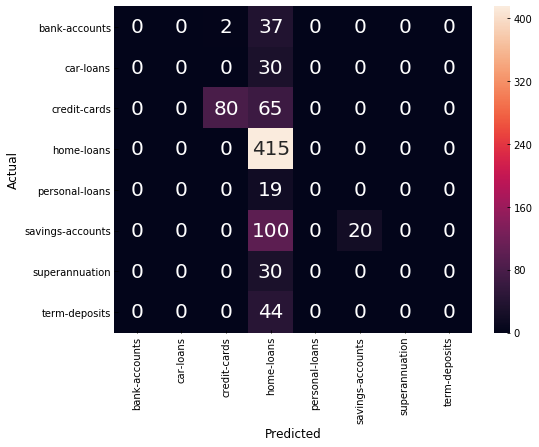

**************************************************************************************
MultinomialNB

accuracy on train 0.9786150712830958

accuracy on test 0.8562945368171021

                   precision    recall  f1-score   support

   bank-accounts       1.00      0.38      0.56        39
       car-loans       1.00      0.23      0.38        30
    credit-cards       0.89      0.94      0.92       145
      home-loans       0.82      1.00      0.90       415
  personal-loans       1.00      0.05      0.10        19
savings-accounts       0.89      0.79      0.84       120
  superannuation       1.00      0.43      0.60        30
   term-deposits       1.00      0.89      0.94        44

       micro avg       0.86      0.86      0.86       842
       macro avg       0.95      0.59      0.65       842
    weighted avg       0.88      0.86      0.83       842



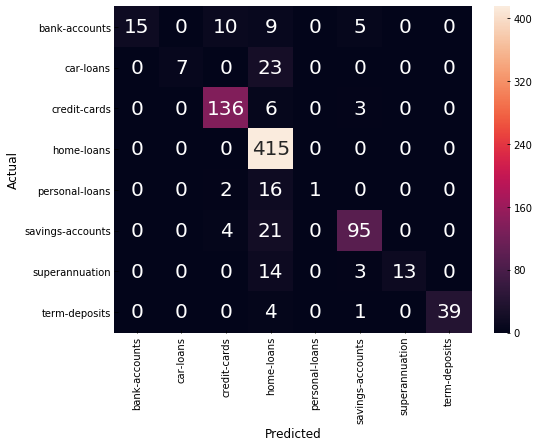

**************************************************************************************
LogisticRegression


C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



accuracy on train 1.0

accuracy on test 0.9311163895486936

                   precision    recall  f1-score   support

   bank-accounts       0.79      0.69      0.74        39
       car-loans       1.00      0.83      0.91        30
    credit-cards       0.93      0.95      0.94       145
      home-loans       0.96      0.98      0.97       415
  personal-loans       0.67      0.84      0.74        19
savings-accounts       0.88      0.86      0.87       120
  superannuation       0.93      0.87      0.90        30
   term-deposits       1.00      0.95      0.98        44

       micro avg       0.93      0.93      0.93       842
       macro avg       0.89      0.87      0.88       842
    weighted avg       0.93      0.93      0.93       842



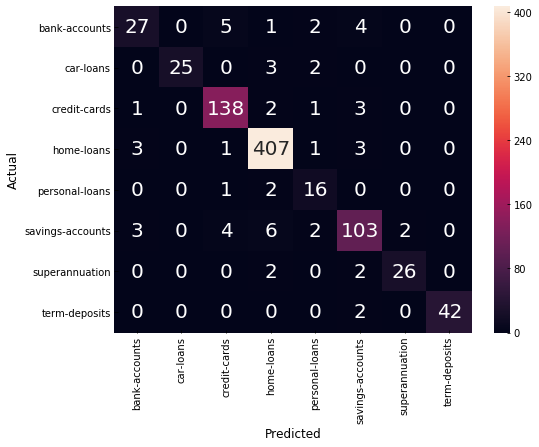

**************************************************************************************


In [17]:
#Full body CVEC
for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    model.fit(X_train_feat, y_train)
    
    y_pred_train = model.predict(X_train_feat)
    y_pred_test = model.predict(X_test_feat)
    print('\naccuracy on train %s' % accuracy_score(y_train, y_pred_train))
    print('\naccuracy on test %s' % accuracy_score(y_test, y_pred_test))
    print('\n',classification_report(y_test, y_pred_test))
    
    conf_mat = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=labels,
                yticklabels=labels
                ,annot_kws={"size": 20})
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    
    print('*'*86)

Logistic regression performed the best of the 3, I will repeat the again with tfidfvectorizer, as it uses word dominance over word count and evalueate the performance

## MODEL BUILDING 2 :Using  TF-IDF

#### TfIDf on Description Column

In [18]:
tfidf_body=TfidfVectorizer(stop_words='english',ngram_range=(1,2)).fit(X_train)

In [19]:
X_train_feat=tfidf_body.transform(X_train)
X_test_feat=tfidf_body.transform(X_test)

In [20]:
models = [
    RandomForestClassifier(n_estimators=250, max_depth=50, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
]

RandomForestClassifier

accuracy on train 0.9928716904276986

accuracy on test 0.8669833729216152

                   precision    recall  f1-score   support

   bank-accounts       1.00      0.46      0.63        39
       car-loans       1.00      0.30      0.46        30
    credit-cards       0.92      0.91      0.91       145
      home-loans       0.81      1.00      0.90       415
  personal-loans       1.00      0.32      0.48        19
savings-accounts       0.97      0.77      0.86       120
  superannuation       1.00      0.57      0.72        30
   term-deposits       1.00      0.93      0.96        44

       micro avg       0.87      0.87      0.87       842
       macro avg       0.96      0.66      0.74       842
    weighted avg       0.89      0.87      0.85       842



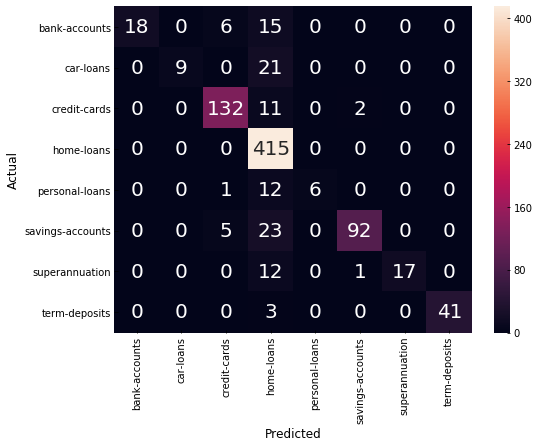

**************************************************************************************
MultinomialNB

accuracy on train 0.6512219959266803

accuracy on test 0.6057007125890737

                   precision    recall  f1-score   support

   bank-accounts       0.00      0.00      0.00        39
       car-loans       0.00      0.00      0.00        30
    credit-cards       0.98      0.61      0.75       145
      home-loans       0.56      1.00      0.72       415
  personal-loans       0.00      0.00      0.00        19
savings-accounts       1.00      0.06      0.11       120
  superannuation       0.00      0.00      0.00        30
   term-deposits       0.00      0.00      0.00        44

       micro avg       0.61      0.61      0.61       842
       macro avg       0.32      0.21      0.20       842
    weighted avg       0.59      0.61      0.50       842



C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


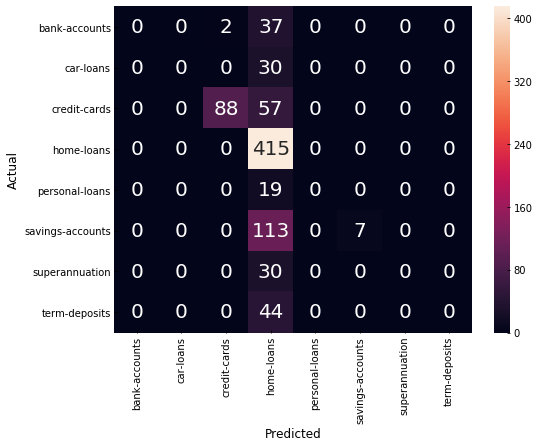

**************************************************************************************
LogisticRegression

accuracy on train 0.9404276985743381

accuracy on test 0.8824228028503563

                   precision    recall  f1-score   support

   bank-accounts       1.00      0.38      0.56        39
       car-loans       1.00      0.67      0.80        30
    credit-cards       0.92      0.90      0.91       145
      home-loans       0.86      0.99      0.92       415
  personal-loans       0.75      0.16      0.26        19
savings-accounts       0.84      0.85      0.85       120
  superannuation       1.00      0.70      0.82        30
   term-deposits       1.00      0.91      0.95        44

       micro avg       0.88      0.88      0.88       842
       macro avg       0.92      0.70      0.76       842
    weighted avg       0.89      0.88      0.87       842



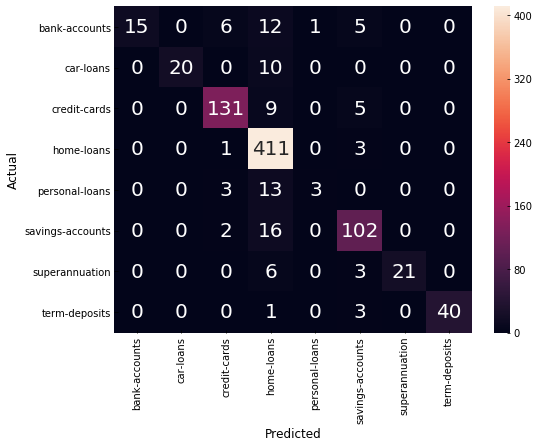

**************************************************************************************


In [21]:
#Full body CVEC
for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    model.fit(X_train_feat, y_train)
    
    y_pred_train = model.predict(X_train_feat)
    y_pred_test = model.predict(X_test_feat)
    print('\naccuracy on train %s' % accuracy_score(y_train, y_pred_train))
    print('\naccuracy on test %s' % accuracy_score(y_test, y_pred_test))
    print('\n',classification_report(y_test, y_pred_test))
    
    conf_mat = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=labels,
                yticklabels=labels
                ,annot_kws={"size": 20})
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    
    print('*'*86)

Logistic regression performed the best althought the accurace dropped, I will now try again by using the category names as stop words. It just to gain insight how well the model will peform without the specific words

## MODEL BUILDING 3 :Using  TF-IDF and custom stopwords

In [22]:
new_stop=stopwords.words('english')

In [47]:
#Adding to the standard stopwords list
titles_words=['car','loans','home','bank','accounts','credit','cards','superannuation','term','deposits',
              'savings','loan','deposit','table','display','saving','account','personal','ratecity','thelatest',
             'follow','get','news', 'article','australians','australia','aussies']
new_stop.extend(titles_words)

In [24]:
tfidf_body=TfidfVectorizer(stop_words=new_stop,ngram_range=(1,2)).fit(X_train)

X_train_feat=tfidf_body.transform(X_train)
X_test_feat=tfidf_body.transform(X_test)

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aussies', 'australia', 'australians'] not in stop_words.
  sorted(inconsistent))


RandomForestClassifier

accuracy on train 0.9852342158859471

accuracy on test 0.8147268408551069

                   precision    recall  f1-score   support

   bank-accounts       1.00      0.44      0.61        39
       car-loans       1.00      0.23      0.38        30
    credit-cards       0.93      0.86      0.89       145
      home-loans       0.74      1.00      0.85       415
  personal-loans       1.00      0.32      0.48        19
savings-accounts       0.96      0.58      0.73       120
  superannuation       1.00      0.47      0.64        30
   term-deposits       1.00      0.75      0.86        44

       micro avg       0.81      0.81      0.81       842
       macro avg       0.95      0.58      0.68       842
    weighted avg       0.86      0.81      0.80       842



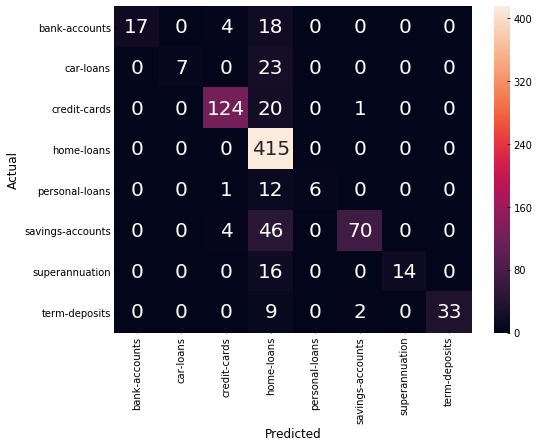

**************************************************************************************
MultinomialNB

accuracy on train 0.6043788187372708

accuracy on test 0.5653206650831354

                   precision    recall  f1-score   support

   bank-accounts       0.00      0.00      0.00        39
       car-loans       0.00      0.00      0.00        30
    credit-cards       0.98      0.41      0.58       145
      home-loans       0.53      1.00      0.69       415
  personal-loans       0.00      0.00      0.00        19
savings-accounts       1.00      0.01      0.02       120
  superannuation       0.00      0.00      0.00        30
   term-deposits       0.00      0.00      0.00        44

       micro avg       0.57      0.57      0.57       842
       macro avg       0.31      0.18      0.16       842
    weighted avg       0.57      0.57      0.45       842



C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


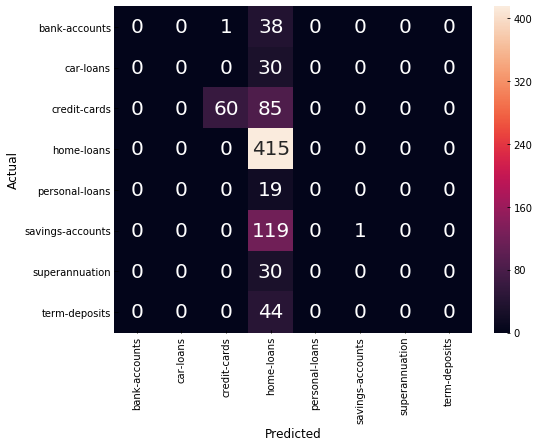

**************************************************************************************
LogisticRegression

accuracy on train 0.8976578411405295

accuracy on test 0.8218527315914489

                   precision    recall  f1-score   support

   bank-accounts       1.00      0.23      0.38        39
       car-loans       1.00      0.10      0.18        30
    credit-cards       0.90      0.88      0.89       145
      home-loans       0.78      1.00      0.88       415
  personal-loans       0.00      0.00      0.00        19
savings-accounts       0.82      0.74      0.78       120
  superannuation       1.00      0.47      0.64        30
   term-deposits       1.00      0.82      0.90        44

       micro avg       0.82      0.82      0.82       842
       macro avg       0.81      0.53      0.58       842
    weighted avg       0.83      0.82      0.79       842



C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


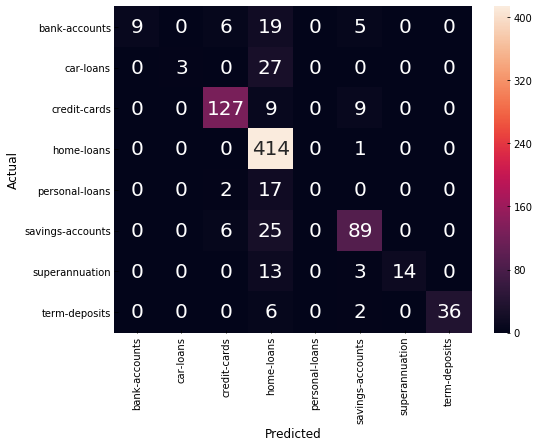

**************************************************************************************


In [25]:
#Full body TFiDF
for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    model.fit(X_train_feat, y_train)
    
    y_pred_train = model.predict(X_train_feat)
    y_pred_test = model.predict(X_test_feat)
    print('\naccuracy on train %s' % accuracy_score(y_train, y_pred_train))
    print('\naccuracy on test %s' % accuracy_score(y_test, y_pred_test))
    print('\n',classification_report(y_test, y_pred_test))
    
    conf_mat = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=labels,
                yticklabels=labels,annot_kws={"size": 20})
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    
    print('*'*86)

Again logistic regression did the best but the accuracy has dropped, moving on I will put back these look, will stick with TFIDF. 

## Most correlated with each category

Using chi^2 test to check for most co-related ngrams within each category

In [26]:
# https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
from sklearn.feature_selection import chi2


In [27]:
article_body.columns

Index(['cleaned_article', 'category_type', 'article_title'], dtype='object')

In [28]:
article_body['category_id'] = article_body['category_type'].factorize()[0]
category_id_df = article_body[['category_type', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values) 
id_to_category = dict(category_id_df[['category_id', 'category_type']].values)
labels=article_body.category_id
article_body.head()

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cleaned_article,category_type,article_title,category_id
0,"little month away end year tax filing season ,...",credit-cards,Working from home? ATO says to make your tax w...,0
1,Australians look new home loan consider refina...,home-loans,Westpac and St.George offer home loan incentives,1
2,CoreLogic research reveal Australian suburb ex...,home-loans,Suburbs with the greatest property change reve...,1
4,want financial freedom ? get equity exist prop...,home-loans,"Line of credit home loans, explained and analy...",1
5,felt rush sense achievement snag fantastic ret...,credit-cards,What your shopping addiction is doing to your ...,0


In [29]:
tfidf_body=TfidfVectorizer(stop_words=new_stop,ngram_range=(1,3)).fit(article_body.cleaned_article)
features=tfidf_body.transform(article_body.cleaned_article)

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aussies', 'australia', 'australians'] not in stop_words.
  sorted(inconsistent))


In [31]:
N = 5
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_body.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print('\x1b[1;31m'+"# '{}':".format(Product)+'\x1b[0m')
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))

# 'bank-accounts':
  . Most correlated unigrams:
. bpay
. payid
. banknote
. atm
. transaction
  . Most correlated bigrams:
. new payments
. payments platform
. real time
. online transaction
. atm fee
  . Most correlated trigrams:
. transaction tip read
. tip read transaction
. best transaction tip
. read transaction guide
. new payments platform
# 'car-loans':
  . Most correlated unigrams:
. fuel
. used
. secured
. dealer
. vehicle
  . Most correlated bigrams:
. type ofcar
. comprehensive insurance
. online quote
. dealer finance
. new vehicle
  . Most correlated trigrams:
. unsecured security required
. linkslow interest loansused
. interest rate application
. rate application fee
. next four year
# 'credit-cards':
  . Most correlated unigrams:
. debt
. balance
. transfer
. reward
. card
  . Most correlated bigrams:
. rate card
. use card
. interest free
. annual fee
. balance transfer
  . Most correlated trigrams:
. interest rate card
. interest free day
. interest free period
. ba

The word distinction looks pretty good at this stage. Theres however some junk words or numbers popping up. This will be dealt wiht accordingly

## Cross Validation for the 3 models

In [32]:
from sklearn.model_selection import cross_val_score

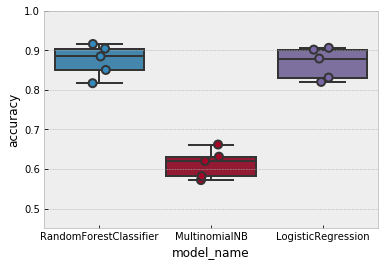

In [53]:
tfidf_body=TfidfVectorizer(stop_words='english',ngram_range=(1,2)).fit(article_body.cleaned_article)
features1=tfidf_body.transform(article_body.cleaned_article)

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features1, article_body.category_type, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# Plotting the accuracy
sns.boxplot(data=cv_df,x='model_name', y='accuracy')
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.ylim([0.45,1])
plt.show()

In [34]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.867883
MultinomialNB             0.613437
RandomForestClassifier    0.874647
Name: accuracy, dtype: float64

In [35]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.884752
1,RandomForestClassifier,1,0.817052
2,RandomForestClassifier,2,0.850534
3,RandomForestClassifier,3,0.916221
4,RandomForestClassifier,4,0.904676
5,MultinomialNB,0,0.631206
6,MultinomialNB,1,0.571936
7,MultinomialNB,2,0.581851
8,MultinomialNB,3,0.620321
9,MultinomialNB,4,0.661871


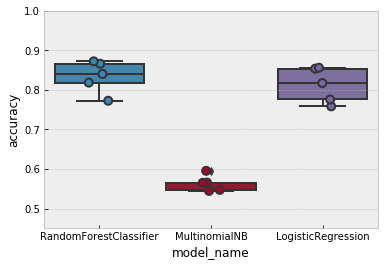

In [54]:
tfidf_body=TfidfVectorizer(stop_words=new_stop,ngram_range=(1,2)).fit(article_body.cleaned_article)
features2=tfidf_body.transform(article_body.cleaned_article)

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features2, article_body.category_type, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Plotting the accuracy
sns.boxplot(data=cv_df2,x='model_name', y='accuracy')
sns.stripplot(x='model_name', y='accuracy', data=cv_df2, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.ylim([0.45,1])
plt.show()

In [37]:
cv_df2.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.812669
MultinomialNB             0.562441
RandomForestClassifier    0.830837
Name: accuracy, dtype: float64

In [38]:
cv_df2

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.840426
1,RandomForestClassifier,1,0.761989
2,RandomForestClassifier,2,0.809609
3,RandomForestClassifier,3,0.871658
4,RandomForestClassifier,4,0.870504
5,MultinomialNB,0,0.563830
6,MultinomialNB,1,0.547069
7,MultinomialNB,2,0.542705
8,MultinomialNB,3,0.563280
9,MultinomialNB,4,0.595324


Between the two stages off stopwords theres a small difference in the accuracy scores. I will try a bit more text cleaning moving forward see if it will improve the accuracy

## More text cleaning to check for improvement: Remove contractions,punctuations and numbers

In [39]:
import string
import re

In [40]:
#Function to remove digits
def number_remove(words):
    strip_words=words.translate(words.maketrans('', '', string.digits))
    return strip_words
#Function to clean out punctuation
def remove_punctuation(words):
    s = words
    replaced = re.sub('[^\w\s]', '', s)
    return replaced 
    
def strip_more(words):
    strip_words=number_remove(words)
    strip_words=remove_punctuation(strip_words)
    return strip_words
    

In [41]:
#New column for the addinally cleaned text
article_body["cleaned_article3"]=article_body.cleaned_article.apply(strip_more)

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the nu

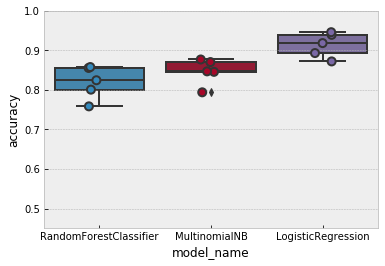

In [55]:
tfidf_body=CountVectorizer(stop_words=new_stop,ngram_range=(1,2)).fit(article_body.cleaned_article3)
features3=tfidf_body.transform(article_body.cleaned_article3)

CV = 5
cv_df3 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features3,article_body.category_type, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df3 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Plotting the accuracy
sns.boxplot(data=cv_df3,x='model_name', y='accuracy')
sns.stripplot(x='model_name', y='accuracy', data=cv_df3, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.ylim([0.45,1])
plt.show()

In [43]:
cv_df3.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.913845
MultinomialNB             0.846488
RandomForestClassifier    0.816214
Name: accuracy, dtype: float64

In [44]:
cv_df3

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.822695
1,RandomForestClassifier,1,0.756661
2,RandomForestClassifier,2,0.791815
3,RandomForestClassifier,3,0.859180
4,RandomForestClassifier,4,0.850719
5,MultinomialNB,0,0.842199
6,MultinomialNB,1,0.793961
7,MultinomialNB,2,0.846975
8,MultinomialNB,3,0.877005
9,MultinomialNB,4,0.872302


The average accuracy increased to above 90% with logistic regression peforming the best. I will move forward with this model try to make additional improvements.

In [25]:
#Saving the dataset with new cleaned article
article_body.to_csv('text3_clean.csv')